# Visualization

In this documentation, we will provide a step-by-step guide on how to create and use visualization tasks.

In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import plotly.io as pio
# pio.renderers.default = "svg"

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.simplefilter('ignore', np.RankWarning)

import logging, sys
logging.disable(sys.maxsize)

## Load Data

In [4]:
try: 
    from tsad.base.datasets import load_skab
except:
    import sys
    sys.path.append('../')
    from tsad.base.datasets import load_skab

In [5]:
dataset = load_skab()
df = dataset.frame
df = df.reset_index(level=[0])
df = df[df['experiment']=='valve1/6']
df = df.drop(columns='experiment')
df.shape

(1154, 10)

In [6]:
#TODO use task in pipeline to resample dataframe
df = df.resample('1s').mean().ffill()
df.shape

(1200, 10)

In [7]:
features = dataset.feature_names
target = dataset.target_names[0]

## Timeseries Visualization with `VisualizationTimeseriesTask`

The `TimeseriesVisualizationTask` class is designed to help you visualize time series data quickly and easily. It uses Plotly Express to create interactive line plots for one or more time series signals.

In [8]:
try: 
    from tsad.tasks.visualization import VisualizationTimeseriesTask
except:
    import sys
    sys.path.append('../')
    from tsad.tasks.visualization import VisualizationTimeseriesTask


The `TimeseriesVisualizationTask` class allows you to perform time series visualization. It includes the following attributes:

- `features` (List[str] | None): A list of features to consider for visualization (optional).
- `use_resampler` (bool, optional): Specifies whether to use the `plotly_resampler` for interactive zooming.
- `scale` (str, optional): The scaling method for the signals, with options 'minmax' and 'standard'.
- `scale_columns` (List[str], optional): A list of specific columns to scale (optional).
- `show_fig` (bool, optional): Indicates whether to display the plot.

Example Usage:

In [9]:
time_seriesvis_task = VisualizationTimeseriesTask()
df_generated, generation_result = time_seriesvis_task.fit(df)
generation_result.show()

## Make custom VisualizationTask

The `tsad` library allows you to create custom visualization tasks to analyze and visualize data easily. In this documentation, we will provide a step-by-step guide on how to create a custom visualization task.

In [10]:
from tsad.base.task import Task, TaskResult
import tsad.utils.visualization as vis


In [11]:
help(vis.plot_missing_values)

Help on function plot_missing_values in module tsad.utils.visualization:

plot_missing_values(dataframe)
    Create a matrix plot of missing values in a DataFrame.
    
    This function uses the `missingno` library to create a matrix plot
    that visualizes missing values in the DataFrame. If the date range
    is small (within the same day), it adds time to the labels.
    
    Args:
        dataframe (pd.DataFrame): The input DataFrame.
    
    Returns:
        matplotlib.axes.Axes: The matplotlib Axes containing the plot.
    
    Example:
        import pandas as pd
        import matplotlib.pyplot as plt
    
        # Create a sample DataFrame with missing values
        data = {'A': [1, 2, None, 4, 5],
                'B': [None, 2, 3, 4, 5],
                'C': [1, 2, 3, 4, 5]}
        df = pd.DataFrame(data)
    
        # Plot missing values
        ax = plot_missing_values(df)
        plt.show()



### Creating the VisualizationCustomResult Class

The first step in creating a custom visualization task is to define the result class, which will store the visualization output. In this case, we are creating the `VisualizationCustomResult` class.

In [12]:
class VisualizationCustomResult(TaskResult):
    def __init__(self):
        self.df = None

    def show(self) -> None:
        if self.df is not None:
            ax = vis.plot_missing_values(self.df)
            plt.show()



In this class:

- We define the `VisualizationCustomResult` class, inheriting from `TaskResult`.
- We initialize the df attribute to None.
- We create the show method, which displays a missing values plot of the DataFrame stored in the df attribute using `vis.plot_missing_values`.

### Creating the `VisualizationCustomTask` Class

Next, we create the `VisualizationCustomTask` class, which performs the data visualization. This class defines the `fit` and `predict` methods.

In [13]:
class VisualizationCustomTask(Task):
    def fit(self, df: pd.DataFrame) -> tuple[pd.DataFrame, VisualizationCustomResult]:
        result = VisualizationCustomResult()
        result.df = df
        return df, result

    def predict(self, df: pd.DataFrame) -> tuple[pd.DataFrame, VisualizationCustomResult]:
        result = VisualizationCustomResult()
        result.df = df
        return df, result

In this class:

- The `fit` method takes a DataFrame `df` as input and returns a tuple containing the original DataFrame and a `VisualizationCustomResult` object that stores the DataFrame for visualization.
- The `predict` method performs similar actions and also returns a tuple with the DataFrame and a `VisualizationCustomResult` object.

### Using the VisualizationCustomTask

Now that we have created our custom visualization task, we can use it to visualize data. Here's how to use the `VisualizationCustomTask`:

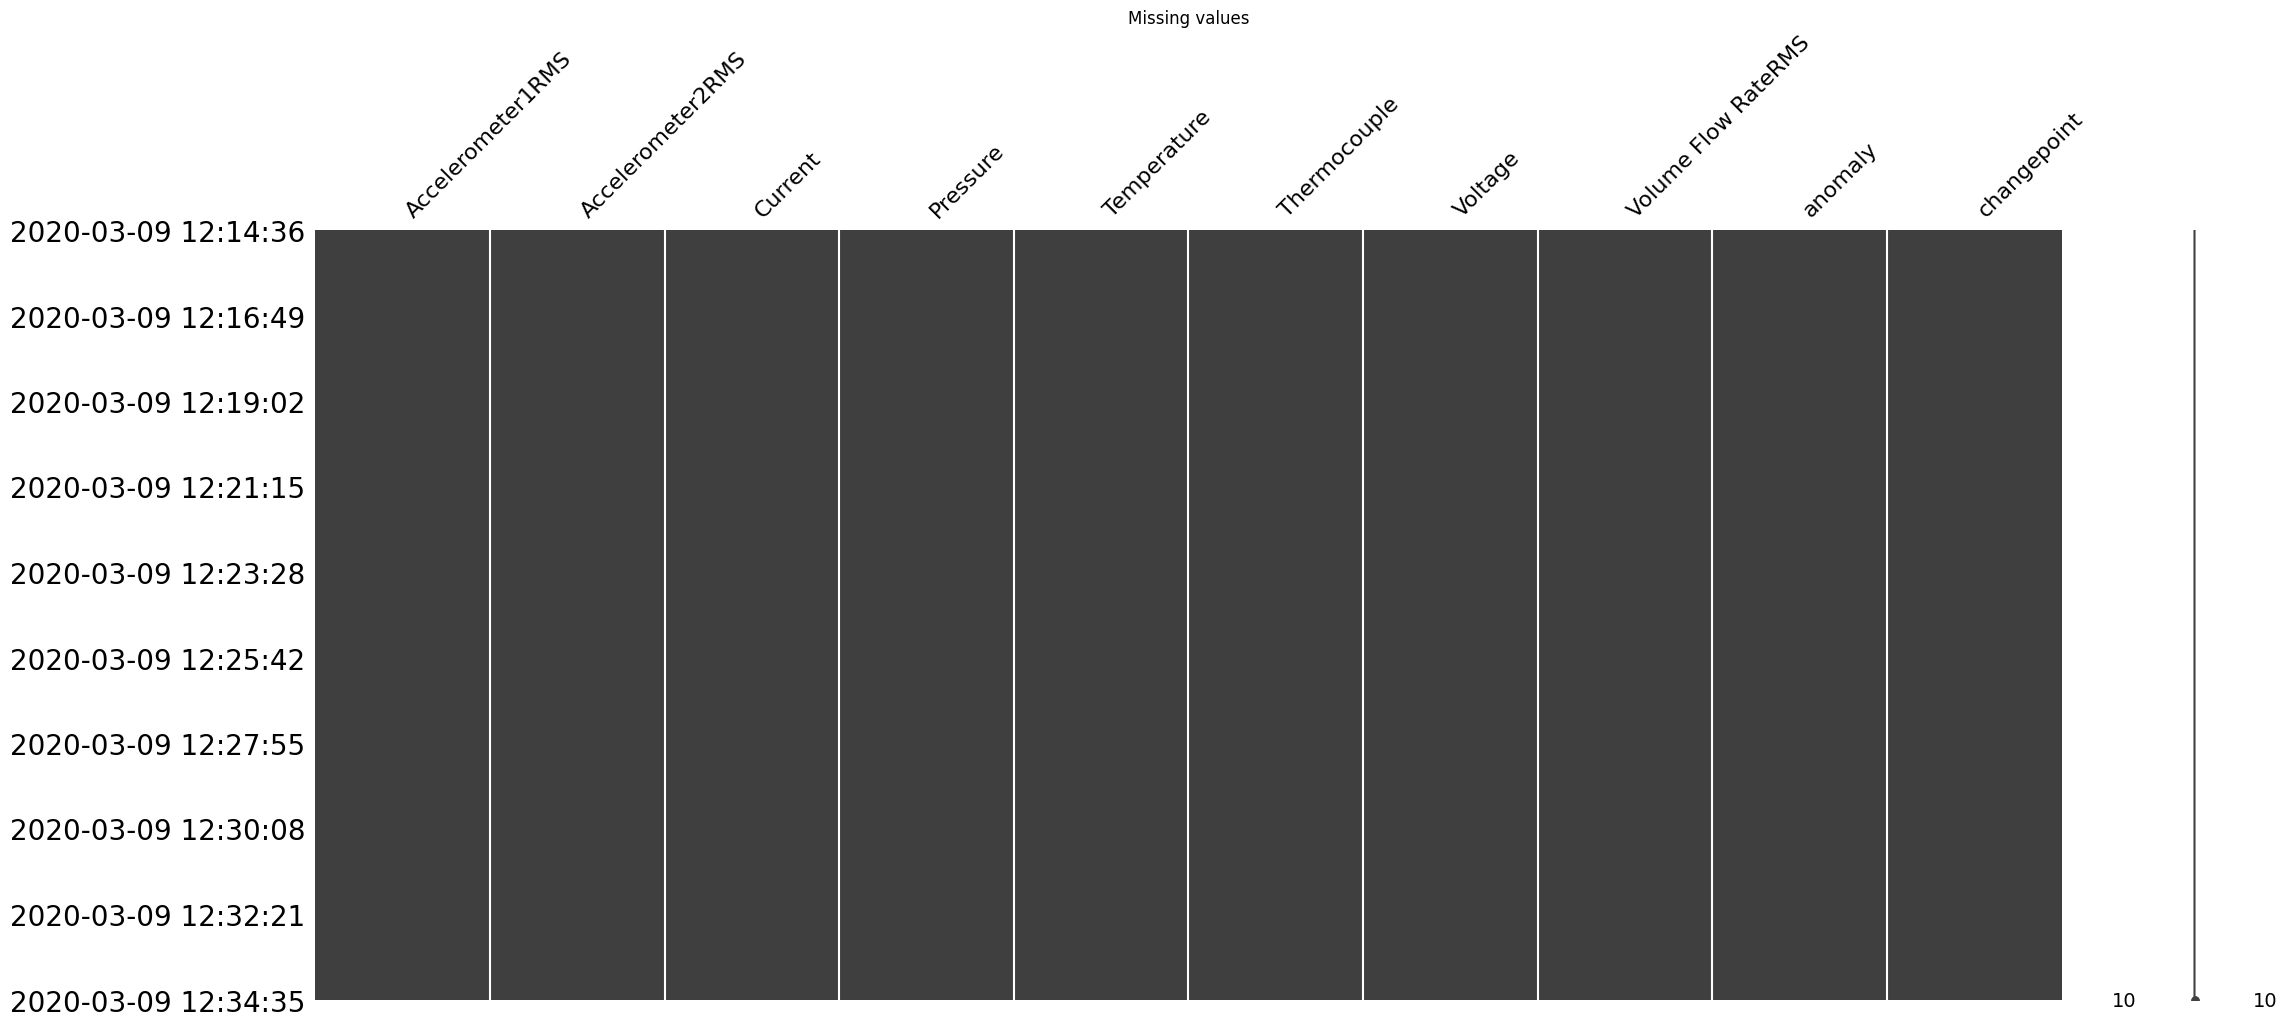

In [14]:
vis_custom_task = VisualizationCustomTask()
df_generated, generation_result = vis_custom_task.fit(df)
generation_result.show()

After running this code, a plot of missing values in your DataFrame will be displayed.

## Using VisualizationTimeseriesTask and VisualizationCustomTask in a Pipeline

The `VisualizationTimeseriesTask` and `VisualizationCustomTask` are a task designed for visualizing time series data. They can be used as part of a pipeline to generate interactive line plots of time series signals based on your DataFrame. Below is an example of how to use `VisualizationTimeseriesTask` and `VisualizationCustomTask` within a pipeline:

In [15]:
try: 
    from tsad.base.pipeline import Pipeline
    from tsad.tasks.feature_generation import FeatureGenerationTask
    from tsad.tasks.feature_selection import FeatureSelectionTask
except:
    import sys
    sys.path.append('../')
    from tsad.base.pipeline import Pipeline
    from tsad.tasks.feature_generation import FeatureGenerationTask
    from tsad.tasks.feature_selection import FeatureSelectionTask

Create a pipeline with `FeatureGenerationTask`, `FeatureSelectionTask`, `VisualizationTimeseriesTask` and `VisualizationCustomTask`

In [16]:
pipeline = Pipeline([
    FeatureGenerationTask(features=features, config=None),  # You can specify a configuration for feature generation.
    FeatureSelectionTask(target=target, 
                         remove_constant_features=True,
                         feature_selection_method='frommodel', 
                         n_features_to_select = 10                     
                        ),
    VisualizationTimeseriesTask(),  # Include TimeseriesVisualizationTask in the pipeline.
    VisualizationCustomTask()
], show=True)  # Set show=True to display the visualization.

'Total generated features: 4332'

'Total selected features: 10'

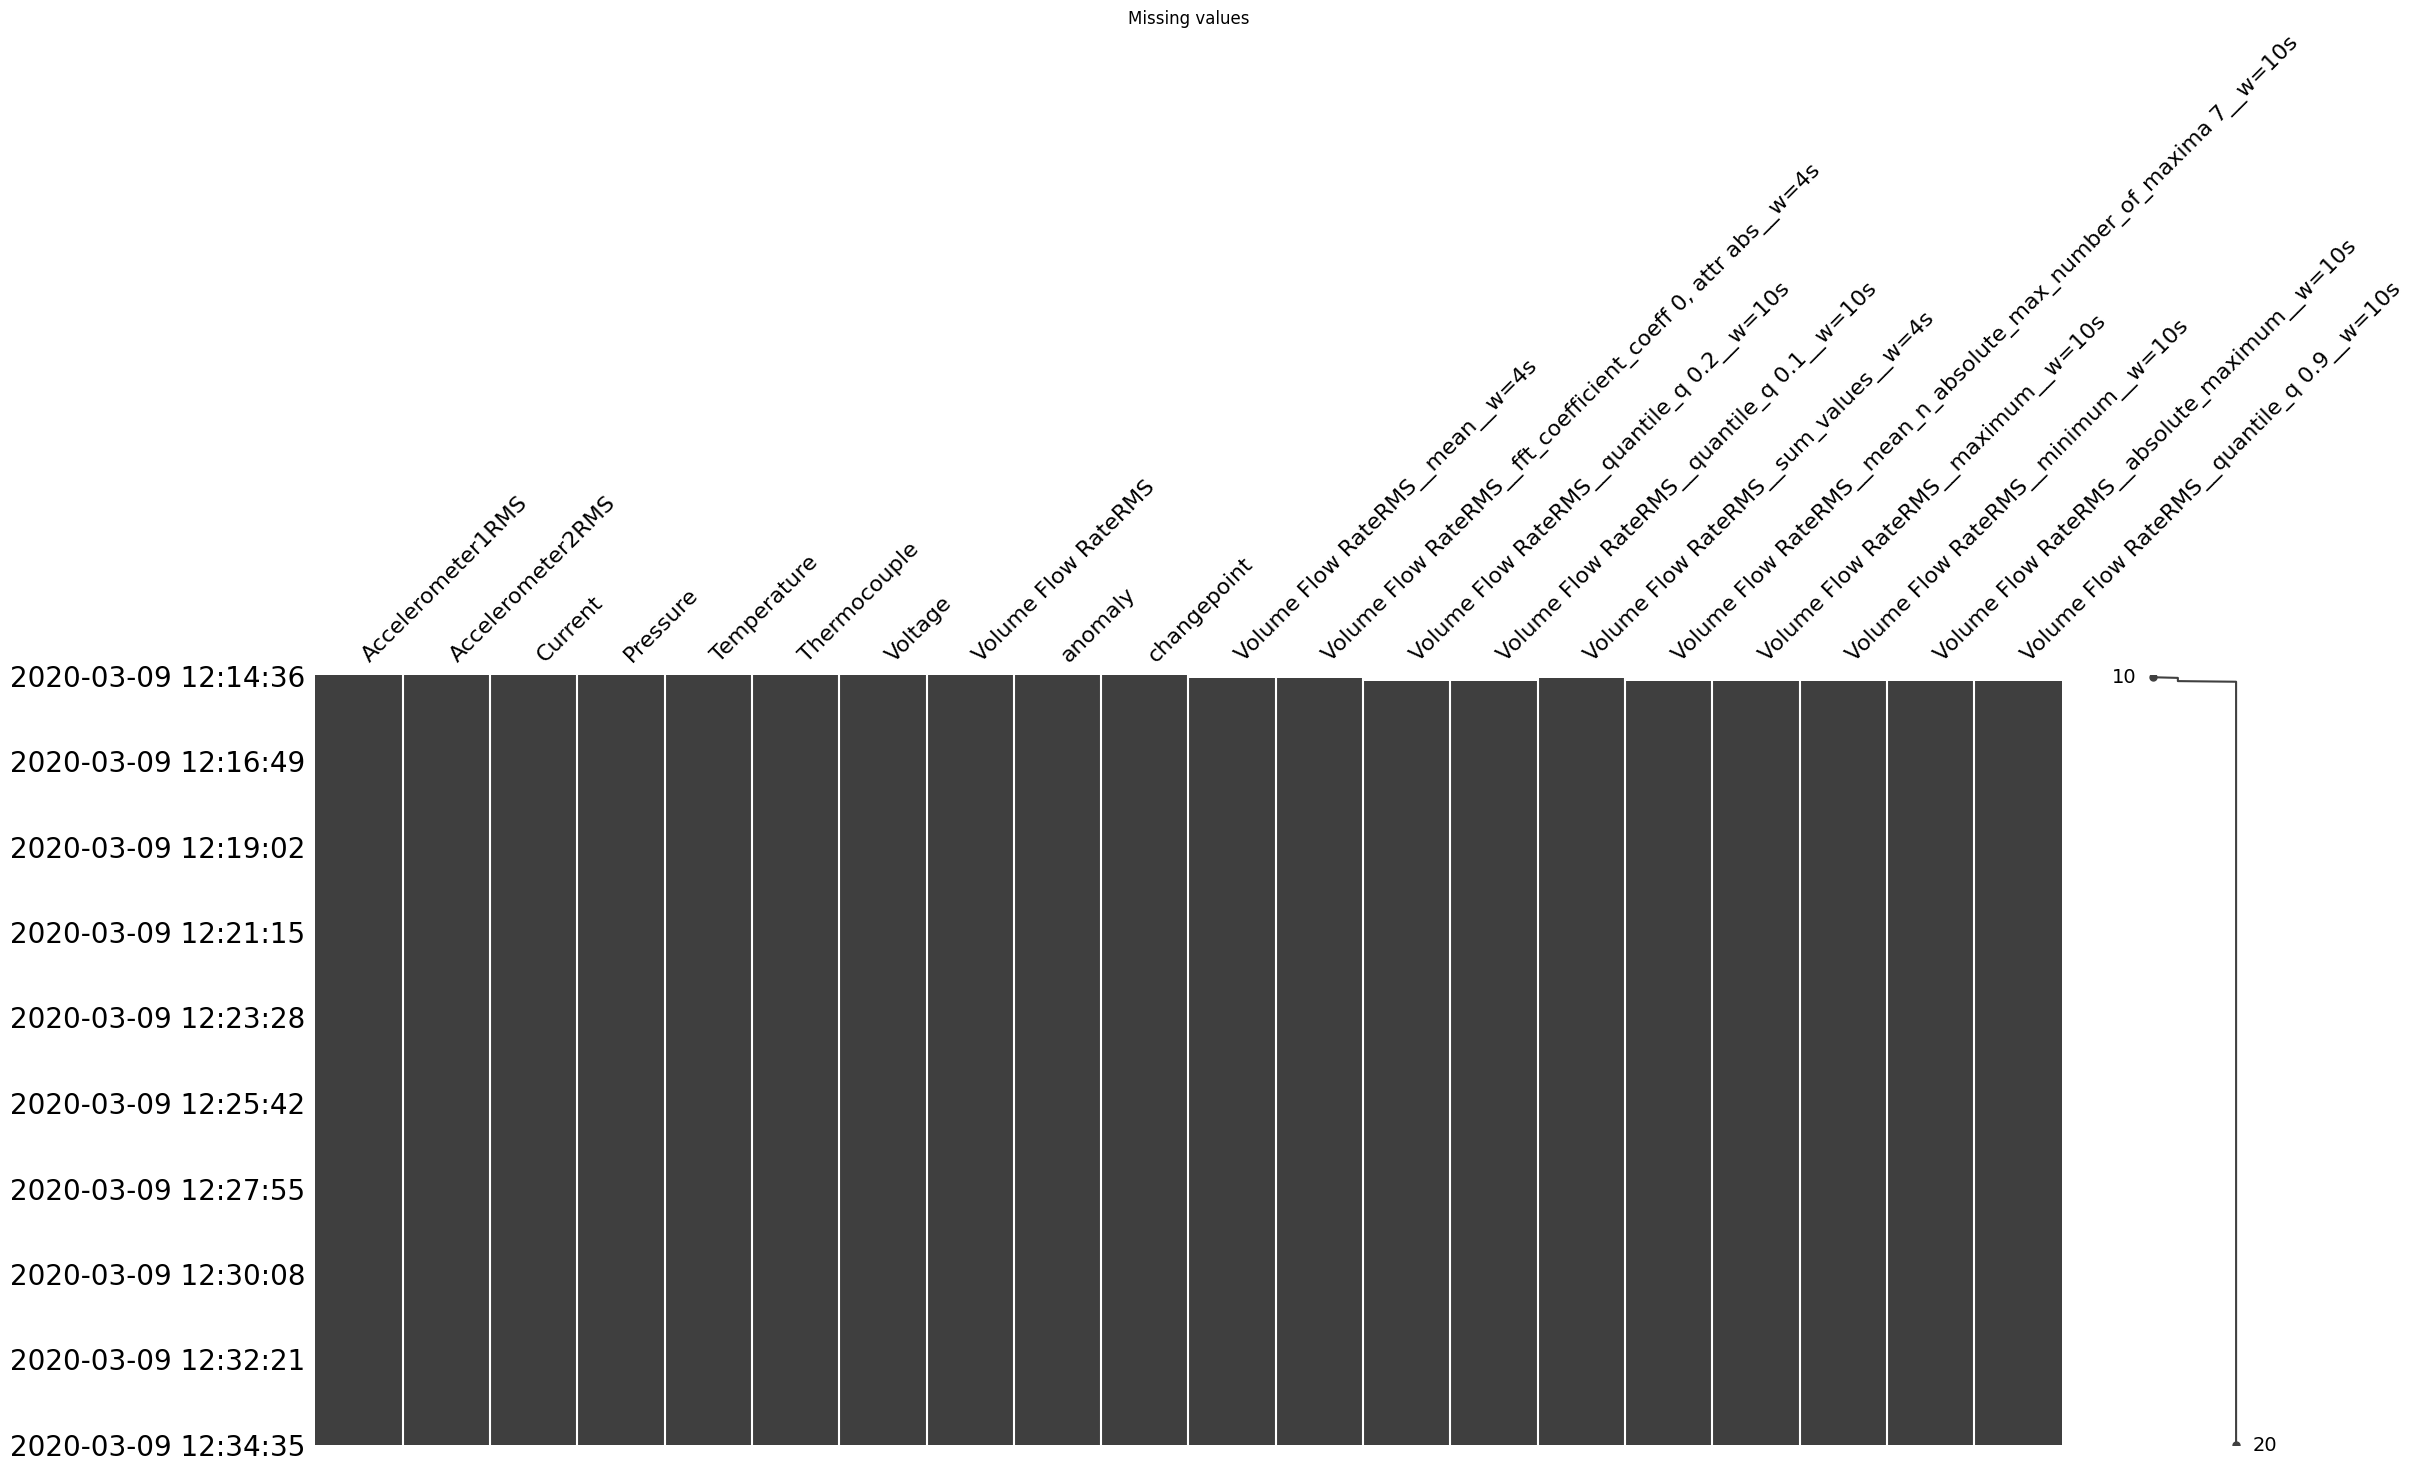

CPU times: user 26 s, sys: 1.65 s, total: 27.6 s
Wall time: 41 s


(1200, 20)

In [17]:
%%time
# Fit the pipeline to your DataFrame
df_fit = pipeline.fit(df)
df_fit.shape

In next example, `df_fit` represents result of Pipeline. You can customize the `features`,  `scale`, and other parameters to suit your specific needs for time series visualization. 

In [18]:
time_seriesvis_task = VisualizationTimeseriesTask(features= [target] + [col for col in df_fit.columns if col.startswith('Volume Flow')],
                                                  scale='minmax')
df_fit, generation_result = time_seriesvis_task.fit(df_fit)
generation_result.show()